In [200]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import altair as alt
from IPython.display import Image
import requests
import json
import tweepy
from collections import Counter
import requests_oauthlib
import inputs 

#### Ejecutamos el archivo y vemos su head

In [173]:
df = pd.read_csv('Countries_usefulFeatures.csv', encoding='latin-1')
df.rename(columns={'Country_Region': 'Country'}, inplace=True)
#Renombro la columna de pais por comodidad 
#df.drop(df.index[47])
df.head()

,Country,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,NaN,NaN,AGO


In [174]:
boats=df.iloc[47],df.iloc[102]
df.drop(df.index[[47,102]], inplace=True)
#Descubro en las filas 47 y 102 dos barcos por lo que los descarto ya que no son paises, si encuentro algun barco mas lo agregare.

### ¿Cuantas filas y columnas hay?

In [175]:
nRow, nCol = df.shape
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 182 filas y 11 columnas


### ¿Cuanta data se ha perdido?

In [176]:
df.isnull().sum()

Country                     0
Population_Size             0
Tourism                     0
Date_FirstFatality         28
Date_FirstConfirmedCase     0
Latitude                    0
Longtitude                  0
Mean_Age                    0
Lockdown_Date              31
Lockdown_Type              31
Country_Code                0
dtype: int64

### Solo 26 paises no registraron la primera muerte por Covid19 y se desconoce el tipo de confinamiento que han aplicado 30 paises.

In [177]:
fullLock=df[df['Lockdown_Type']=='Full']
fullLock.shape[0]
print(f"El numero de paises que han aplicado una cuarentena total es de {fullLock.shape[0]} de {df.shape[0]} paises que se han cogido para el estudio")

El numero de paises que han aplicado una cuarentena total es de 116 de 182 paises que se han cogido para el estudio


In [178]:
late=df[['Country','Tourism','Lockdown_Date','Lockdown_Type']].sort_values(by='Lockdown_Date', ascending=False)
late.dropna(inplace =True)
print(f"El primer pais en aplicar la cuarentena fue {late.iloc[-1][0]} y el ultimo {late.iloc[0][0]}.")

El primer pais en aplicar la cuarentena fue China y el ultimo Sierra Leone.


In [195]:
mperj=df[['Country','Tourism','Lockdown_Date','Lockdown_Type']].sort_values(by='Tourism', ascending=False)
mperj



,Country,Tourism,Lockdown_Date,Lockdown_Type
61,France,89322000,2020-03-16,Full
156,Spain,82773000,2020-03-14,Full
171,US,79745920,2020-03-23,Partial
36,China,62900000,2020-01-23,Full
84,Italy,61567200,2020-03-11,Full
...,...,...,...,...
139,Rwanda,14000,2020-03-16,Full
140,Saint Kitts and Nevis,14000,2020-03-31,Full
141,Saint Lucia,14000,2020-03-20,Full
142,Saint Vincent and the Grenadines,14000,NaT,NaN


### En el rango de una semana el top 3 mundial de visitantes turisticos tuvieron que aplicar cuarentena, de los cuales Francia y España tuvieron que aplicarla del tipo total, siendo un desastre para sus economias


In [180]:
menper=df[['Country','Longtitude','Lockdown_Date']]
menper.sort_values(by='Longtitude', ascending= True)

,Country,Longtitude,Lockdown_Date
32,Canada,-106.346771,2020-03-16
111,Mexico,-102.552784,2020-03-14
171,US,-95.712891,2020-03-23
69,Guatemala,-90.230759,NaN
53,El Salvador,-88.896530,2020-03-12
...,...,...,...
8,Australia,133.775136,2020-03-25
86,Japan,138.252924,2020-02-27
130,Papua New Guinea,143.955550,2020-03-24
121,New Zealand,174.885971,2020-03-25


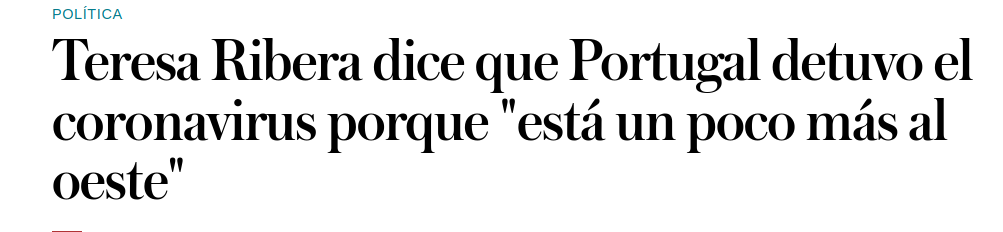

In [181]:
from IPython.display import Image
Image(filename='../Covid19MAD/Outputs/captura_de_pantalla.png')

### Utilizo la logica de nuestra flamante vicepresidente para comprobar si se utilizo este argumento para aplicar cuarentenas, tras comprobar el resultado parece que no hay diferencias intrinsecas.

In [182]:
df['Date_FirstConfirmedCase'] = pd.to_datetime(df['Date_FirstConfirmedCase'])
df['Date_FirstFatality']= pd.to_datetime(df['Date_FirstFatality'])
df['Lockdown_Date']=pd.to_datetime(df['Lockdown_Date'])
df['Lethal_lapse']= df['Date_FirstFatality']-df['Date_FirstConfirmedCase']

In [196]:

df['Lethal_lapse']

#Asignamos la nueva columna con los dias transcurridos desde el primer caso confirmado hasta la primera muerte y reorganizamos
premura=df.sort_values(by='Lethal_lapse', ascending=False)
premura=premura.dropna()
print(f"El pais que menos tardo en detectar un fallecido relacionado tras el primer caso fue {premura.iloc[-1][0]} y el que mas fue {premura.iloc[0][0]} .")
premura

El pais que menos tardo en detectar un fallecido relacionado tras el primer caso fue Iran y el que mas fue Sri Lanka .


,Country,Population_Size,Tourism,Mean_Age,Date_FirstConfirmedCase,Date_FirstFatality,Lethal_lapse,Lockdown_Date,Days_to_Lockdown,Lockdown_Type,Latitude,Longtitude,Country_Code,Relative Tourism
157,Sri Lanka,21670000,2334000,32.3,2020-01-28,2020-03-29,61 days,2020-03-21,-53 days,Full,7.873054,80.771797,LKA,5.057778e+11
150,Singapore,5638676,14673000,40.0,2020-01-24,2020-03-22,58 days,2020-03-26,-62 days,Partial,1.352083,103.819836,SGP,8.273629e+11
60,Finland,5515525,3224000,42.5,2020-01-30,2020-03-22,52 days,2020-03-27,-57 days,Full,61.924110,25.748151,FIN,1.778205e+11
105,Malaysia,31528585,25832000,27.7,2020-01-26,2020-03-18,52 days,2020-03-18,-52 days,Full,4.210484,101.975766,MYS,8.144464e+12
174,United Arab Emirates,9630959,21286000,33.4,2020-01-30,2020-03-21,51 days,2020-03-24,-54 days,Full,23.424076,53.847818,ARE,2.050046e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,China,1392730000,62900000,37.0,2020-01-22,2020-01-23,1 days,2020-01-23,-1 days,Full,35.861660,104.195397,CHN,8.760272e+14
158,Sudan,41801533,836000,18.9,2020-03-14,2020-03-14,0 days,2020-03-24,-10 days,Partial,12.862807,30.217636,SDN,3.494608e+11
171,US,326687501,79745920,37.6,2020-03-10,2020-03-10,0 days,2020-03-23,-13 days,Partial,37.090240,-95.712891,USA,2.605200e+14
91,Kosovo,1845300,14000,37.0,2020-03-27,2020-03-27,0 days,2020-03-25,2 days,Partial,42.602636,20.902977,RKS,2.583420e+08


In [184]:
df['Days_to_Lockdown']= df['Date_FirstConfirmedCase']-df['Lockdown_Date']
columnas_a_ordernar=['Country','Population_Size','Tourism','Mean_Age','Date_FirstConfirmedCase','Date_FirstFatality','Lethal_lapse','Lockdown_Date','Days_to_Lockdown','Lockdown_Type']
nuevas_columnas=columnas_a_ordernar+(df.columns.drop(columnas_a_ordernar).tolist())
df=df[nuevas_columnas]
enclaustro=df.sort_values(by='Days_to_Lockdown', ascending=True)
enclaustro=enclaustro.dropna()
e=df.loc[df['Days_to_Lockdown']=='0 days']
e=[i for i in e['Country']]
z = ', '.join([str(elem) for elem in e])
print(f"Los paises que menos tardaron en enclaustrarse fueron {z} con cero dias y el que mas fue {enclaustro.iloc[0][0]} con {enclaustro.iloc[0][7]}.")
df

Los paises que menos tardaron en enclaustrarse fueron Azerbaijan, Bahrain, Bolivia, Fiji, Ghana, Jamaica con cero dias y el que mas fue Singapore con 2020-03-26 00:00:00.


,Country,Population_Size,Tourism,Mean_Age,Date_FirstConfirmedCase,Date_FirstFatality,Lethal_lapse,Lockdown_Date,Days_to_Lockdown,Lockdown_Type,Latitude,Longtitude,Country_Code
0,Afghanistan,37172386,14000,17.3,2020-02-25,2020-03-23,27 days,2020-03-24,-28 days,Full,33.939110,67.709953,AFG
1,Albania,2866376,5340000,36.2,2020-03-10,2020-03-12,2 days,2020-03-08,2 days,Full,41.153332,20.168331,ALB
2,Algeria,42228429,2657000,27.5,2020-02-26,2020-03-13,16 days,2020-03-24,-27 days,Full,28.033886,1.659626,DZA
3,Andorra,77006,3042000,37.0,2020-03-03,2020-03-23,20 days,2020-03-16,-13 days,Full,42.546245,1.601554,AND
4,Angola,30809762,218000,16.4,2020-03-21,2020-03-30,9 days,NaT,NaT,NaN,-11.202692,17.873887,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Vietnam,95540395,15498000,37.0,2020-01-24,NaT,NaT,2020-03-19,-55 days,Full,14.058324,108.277199,VNM
180,West Bank and Gaza,4569087,606000,37.0,2020-03-06,2020-03-27,21 days,2020-04-09,-34 days,Full,31.946600,35.302700,PSE
181,Western Sahara,500000,14000,26.8,2020-04-06,NaT,NaT,2020-03-20,17 days,Full,24.215527,-12.885834,ESH
182,Zambia,17351822,1072000,17.1,2020-03-19,2020-04-03,15 days,NaT,NaT,NaN,-13.133897,27.849332,ZMB


In [197]:
df['Days_to_Lockdown'].dropna(inplace =True)
df['Days_to_Lockdown']=df['Days_to_Lockdown'].astype(int)

paisesprc=df[['Country','Days_to_Lockdown']]
paisesprc=df[['Country','Days_to_Lockdown','Date_FirstConfirmedCase']].groupby('Days_to_Lockdown').agg('max').reset_index()

alt.Chart(paisesprc).mark_bar().encode(
    x="Country",
    y="Days_to_Lockdown",
    color=alt.condition(
        alt.datum.Lockdown_Date > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    ),
    tooltip=['Country','Days_to_Lockdown','Date_FirstConfirmedCase']
).properties(height=400,width=600,title="¿Cuantos dias pasaron para el enclaustro?")
#Mostrar paises frente dias que tardaron en encerrarse

alt.Chart(...)

In [186]:
grafica_turismo_lapso=df[['Date_FirstFatality','Country']].groupby('Date_FirstFatality').agg('max').reset_index()
#Paises agrupados por turismo vs dias que tardaron en encerrarse 
bar = alt.Chart(grafica_turismo_lapso).mark_bar().encode(
    x='Country',
    y='Date_FirstFatality',
    tooltip=['Country','Date_FirstFatality']
)

rule = alt.Chart(grafica_turismo_lapso).mark_rule(color='red').encode(
    y='mean(Date_FirstFatality):Q',
    tooltip=['Date_FirstFatality):Q']
)

(bar + rule).properties(height=400,width=600,title="yas")


alt.LayerChart(...)

In [187]:
df['Relative Tourism']=(df['Tourism']/100)*df['Population_Size']
paisesmasturisticos=df[['Relative Tourism','Country']].sort_values(by='Relative Tourism')
#pip install collections-extended
print(f"El pais mas turistico percentualmente es {paisesmasturisticos.max()[1]} y el menor {paisesmasturisticos.min()[1]}")

El pais mas turistico percentualmente es Zimbabwe y el menor Afghanistan


In [188]:
df.sort_values(by='Relative Tourism').min()

Country                            Afghanistan
Population_Size                            825
Tourism                                  14000
Mean_Age                                  14.9
Date_FirstConfirmedCase    2020-01-22 00:00:00
Date_FirstFatality         2020-01-23 00:00:00
Lethal_lapse                   0 days 00:00:00
Lockdown_Date              2020-01-23 00:00:00
Days_to_Lockdown            -62 days +00:00:00
Latitude                              -40.9006
Longtitude                            -106.347
Country_Code                               AFG
Relative Tourism                        115500
dtype: object

In [189]:
#Probar, hightlight celdas planets.head(10).style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

In [191]:
Turismo_Diasencierro=df[['Days_to_Lockdown','Tourism','Country']].sort_values(by='Days_to_Lockdown')

Turismo_Diasencierro=Turismo_Diasencierro.dropna()
#Recopila dias hasta el encierro, nº turistas y nombre del pais recopilado por numeros de dia para el encierro

In [192]:
#Arreglar grafica, api, 

In [201]:
import os
from dotenv import load_dotenv
load_dotenv()


def Sort_Covid():
    sort_list=Split_Tweets()
    cov= []
    for sentence in sort_list:
        for word in sentence:
            if word.startswith("Coronavirus") or ("Covid"):
                cov.append(word)
    return cov

NameError: name 'requests_oauthlib' is not defined

In [205]:
def get_tweets(user):
    my_auth = get_auth()
    url = f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={user}&count=100&tweet_mode=extended'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()

get_tweets('POTUS')

NameError: name 'requests_oauthlib' is not defined

NameError: name 'Usuario' is not defined